In [1]:
%matplotlib inline
import sys
sys.path.append('..')
from d2l import torch as d2l
import torch
from torch.distributions import multinomial

In [2]:
fair_probs = torch.ones([6])/6
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 0., 1., 0., 0., 0.])

In [3]:
multinomial.Multinomial(600000, fair_probs).sample()/600000

tensor([0.1666, 0.1668, 0.1658, 0.1675, 0.1665, 0.1668])

In [4]:
multinomial.Multinomial(100, fair_probs).sample((10,))

tensor([[17., 17., 25.,  8., 21., 12.],
        [19., 16., 16., 22., 13., 14.],
        [11., 20., 12., 22., 20., 15.],
        [17., 16., 21., 13., 19., 14.],
        [14., 13., 20., 18., 23., 12.],
        [15., 20., 19., 17., 20.,  9.],
        [11., 19., 20., 21., 18., 11.],
        [20., 18., 18., 16., 13., 15.],
        [16., 16., 21., 24., 11., 12.],
        [17., 17., 16., 18., 19., 13.]])

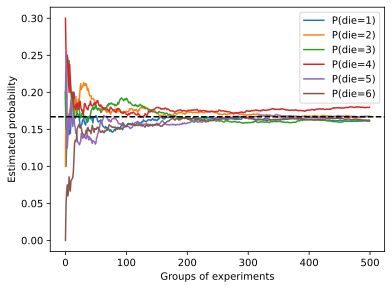

In [5]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim = 1, keepdims = True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(), label = ("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y = 0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel("Groups of experiments")
d2l.plt.gca().set_ylabel("Estimated probability")
d2l.plt.legend()